In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Aqib Talib_Trans 1.csv"
csv_path2 = "../Player Tweets/Aqib Talib_Trans 2.csv"
csv_path3 = "../Player Tweets/Aqib Talib_Trans 3.csv"

#Establish pd dataframe for each file
aqibtalib1 = pd.read_csv(csv_path1, sep=";")
aqibtalib2 = pd.read_csv(csv_path2, sep=";")
aqibtalib3 = pd.read_csv(csv_path3, sep=";", error_bad_lines=False)

#concatenate data frames
aqibtalib_master = pd.concat([aqibtalib1, aqibtalib2, aqibtalib3])
aqibtalib_master

b'Skipping line 2977: expected 10 fields, saw 11\nSkipping line 3060: expected 10 fields, saw 11\nSkipping line 3666: expected 10 fields, saw 11\nSkipping line 8694: expected 10 fields, saw 11\nSkipping line 9443: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-04-29 13:48,0,0,"Meet your new Tampa Bay Buccaneer, Aqib Talib....",NaN,NaN,NaN,7.997405e+08,https://twitter.com/JeffHouck/status/799740463
1,NaN,2008-04-28 11:21,0,0,Breaking News: Newest Buc Talib All Smiles In ...,NaN,NaN,NaN,7.988233e+08,https://twitter.com/TBOcom/status/798823313
2,NaN,2008-04-26 17:22,0,0,Talib selected 20th overall by Tampa Bay : For...,NaN,NaN,NaN,7.976972e+08,https://twitter.com/LJWorld/status/797697160
3,NaN,2008-04-26 16:31,0,0,"Oh, I really like the Bucs getting Aqib Talib....",NaN,NaN,NaN,7.976752e+08,https://twitter.com/danshanoff/status/797675210
4,NaN,2008-04-26 16:29,0,0,I hope all of the off the field problems don't...,NaN,NaN,NaN,7.976744e+08,https://twitter.com/andjuan/status/797674355
5,NaN,2008-04-26 16:20,1,0,"With the 20th pick, the Tampa Bay Buccaneers s...",NaN,NaN,NaN,7.976708e+08,https://twitter.com/headblitz/status/797670808
6,NaN,2008-04-26 16:20,0,0,The Tampa Bay Buccaneers have selected Aqib Ta...,NaN,NaN,NaN,7.976708e+08,https://twitter.com/MiamiHerald/status/797670760
0,NaN,2012-11-07 17:47,1,0,"Every time I attempt to type Aqib Talib, I def...",NaN,@,NaN,2.663259e+17,https://twitter.com/nick_underhill/status/2663...
1,NaN,2012-11-07 14:54,2,0,Deion Branch recognizes CB Aqib Talib as ‘a gr...,NaN,NaN,NaN,2.662825e+17,https://twitter.com/TruPatriot4ever/status/266...
2,NaN,2012-11-07 14:53,4,1,Will everyone give Aqib Talib a chance to at l...,NaN,NaN,NaN,2.662822e+17,https://twitter.com/BosSportsExtra/status/2662...


In [2]:
#fillna's with text to fix error
aqibtalib_master["text"].fillna("text", inplace=True)
aqibtalib_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-04-29 13:48,0,0,"Meet your new Tampa Bay Buccaneer, Aqib Talib....",NaN,NaN,NaN,799740463.0,https://twitter.com/JeffHouck/status/799740463
1,NaN,2008-04-28 11:21,0,0,Breaking News: Newest Buc Talib All Smiles In ...,NaN,NaN,NaN,798823313.0,https://twitter.com/TBOcom/status/798823313
2,NaN,2008-04-26 17:22,0,0,Talib selected 20th overall by Tampa Bay : For...,NaN,NaN,NaN,797697160.0,https://twitter.com/LJWorld/status/797697160
3,NaN,2008-04-26 16:31,0,0,"Oh, I really like the Bucs getting Aqib Talib....",NaN,NaN,NaN,797675210.0,https://twitter.com/danshanoff/status/797675210
4,NaN,2008-04-26 16:29,0,0,I hope all of the off the field problems don't...,NaN,NaN,NaN,797674355.0,https://twitter.com/andjuan/status/797674355


In [3]:
#create list of sentiment scores associated with tweets about relevant player

aqibtalib_sent = []

tweets = aqibtalib_master["text"]

for index,tweet in aqibtalib_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    aqibtalib_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
aqibtalib_sent



[{'Compound': 0.4588,
  'Negative': 0.833,
  'Neutral': 0.0,
  'Positive': 0.167,
  'date': '2008-04-29 13:48'},
 {'Compound': 0.4767,
  'Negative': 0.838,
  'Neutral': 0.0,
  'Positive': 0.162,
  'date': '2008-04-28 11:21'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-04-26 17:22'},
 {'Compound': 0.7313,
  'Negative': 0.722,
  'Neutral': 0.0,
  'Positive': 0.278,
  'date': '2008-04-26 16:31'},
 {'Compound': 0.7964,
  'Negative': 0.617,
  'Neutral': 0.06,
  'Positive': 0.323,
  'date': '2008-04-26 16:29'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-04-26 16:20'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-04-26 16:20'},
 {'Compound': -0.34,
  'Negative': 0.862,
  'Neutral': 0.138,
  'Positive': 0.0,
  'date': '2012-11-07 17:47'},
 {'Compound': 0.6249,
  'Negative': 0.745,
  'Neutral': 0.0,
  'Positive': 0.255,
  'date': '2012-11-07 14:54'},
 {'C

In [4]:
# Convert player sentiments to DataFrame
AT_pd = pd.DataFrame.from_dict(aqibtalib_sent)
AT_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.4588,0.833,0.00,0.167,2008-04-29 13:48
1,0.4767,0.838,0.00,0.162,2008-04-28 11:21
2,0.0000,1.000,0.00,0.000,2008-04-26 17:22
3,0.7313,0.722,0.00,0.278,2008-04-26 16:31
4,0.7964,0.617,0.06,0.323,2008-04-26 16:29


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(aqibtalib_master, AT_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2008-04-29 13:48,0,0,"Meet your new Tampa Bay Buccaneer, Aqib Talib....",NaN,NaN,NaN,799740463.0,https://twitter.com/JeffHouck/status/799740463,0.4588,0.833,0.00,0.167
1,NaN,2008-04-28 11:21,0,0,Breaking News: Newest Buc Talib All Smiles In ...,NaN,NaN,NaN,798823313.0,https://twitter.com/TBOcom/status/798823313,0.4767,0.838,0.00,0.162
2,NaN,2008-04-26 17:22,0,0,Talib selected 20th overall by Tampa Bay : For...,NaN,NaN,NaN,797697160.0,https://twitter.com/LJWorld/status/797697160,0.0000,1.000,0.00,0.000
3,NaN,2008-04-26 16:31,0,0,"Oh, I really like the Bucs getting Aqib Talib....",NaN,NaN,NaN,797675210.0,https://twitter.com/danshanoff/status/797675210,0.7313,0.722,0.00,0.278
4,NaN,2008-04-26 16:29,0,0,I hope all of the off the field problems don't...,NaN,NaN,NaN,797674355.0,https://twitter.com/andjuan/status/797674355,0.7964,0.617,0.06,0.323


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2008-04-29 13:48,0,0,"Meet your new Tampa Bay Buccaneer, Aqib Talib....",NaN,NaN,NaN,799740463.0,https://twitter.com/JeffHouck/status/799740463,0.4588,0.833,0.00,0.167,2008-04-29
1,NaN,2008-04-28 11:21,0,0,Breaking News: Newest Buc Talib All Smiles In ...,NaN,NaN,NaN,798823313.0,https://twitter.com/TBOcom/status/798823313,0.4767,0.838,0.00,0.162,2008-04-28
2,NaN,2008-04-26 17:22,0,0,Talib selected 20th overall by Tampa Bay : For...,NaN,NaN,NaN,797697160.0,https://twitter.com/LJWorld/status/797697160,0.0000,1.000,0.00,0.000,2008-04-26
3,NaN,2008-04-26 16:31,0,0,"Oh, I really like the Bucs getting Aqib Talib....",NaN,NaN,NaN,797675210.0,https://twitter.com/danshanoff/status/797675210,0.7313,0.722,0.00,0.278,2008-04-26
4,NaN,2008-04-26 16:29,0,0,I hope all of the off the field problems don't...,NaN,NaN,NaN,797674355.0,https://twitter.com/andjuan/status/797674355,0.7964,0.617,0.06,0.323,2008-04-26


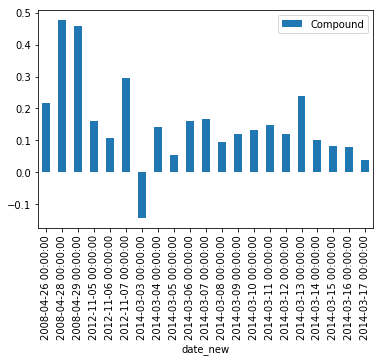

In [7]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('aqibtalib.png')
plt.show()
